<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/Session_221128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **케라스 실습 필사 : 의류 이미지 분류**
https://www.tensorflow.org/tutorials/keras/classification?hl=ko#%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8


---






## **1. 라이브러리 임포트**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## **2. 의류 MNIST 데이터셋 임포트**

  - 10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 사용한다.
  - 이미지는 해상도(28x28 픽셀)가 낮고, 다음처럼 개별 옷 품목을 나타낸다.

<table>
  <tr><td>     <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">   </td></tr>
  <tr><td align="center">     <b>그림 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br>{nbsp}   </td></tr>
</table>

  - 패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 [MNIST](http://yann.lecun.com/exdb/mnist/) 데이터셋을 대신해서 자주 사용된다. 
  - MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있는데, 여기서 사용하려는 의류 이미지와 동일한 포맷이다.
  
  - 60,000개의 이미지를 사용하여 네트워크를 훈련하고, 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가한다. 
  - TensorFlow에서 직접 Fashion MNIST를 가져오고 로드한다. [Fashion MNIST 데이터](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


  - load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환된다.
    - `train_images`와 `train_labels` 배열은 모델 학습에 사용되는 *훈련 세트*이다.
    - `test_images`와 `test_labels` 배열은 모델 테스트에 사용되는 *테스트 세트*이다.

  - 이미지는 28x28 크기의 넘파이 배열이고, 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 이 값은 이미지에 있는 옷의 *클래스*(class)를 나타낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

  - 각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 *클래스 이름*이 들어있지 않기 때문에, 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [3]:
# 별도의 변수명으로 지정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## **2. 데이터 탐색**

  - 모델을 훈련하기 전에 데이터셋 구조를 살펴보자. 
  - 다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여준다. 각 이미지는 28x28 픽셀로 표현된다.

In [4]:
train_images.shape

(60000, 28, 28)

  - 훈련 세트에는 총 60,000개의 데이터가 존재한다.

In [5]:
len(train_labels)

60000

  - 각 레이블은 0과 9사이의 정수이다.

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

  - 테스트 세트에는 10,000개의 이미지가 존재한다. 이 이미지 역시 28x28 픽셀로 표현된다.

In [7]:
test_images.shape

(10000, 28, 28)

  - 테스트 세트는 10,000개의 이미지에 대한 레이블을 갖는다.

In [8]:
len(test_labels)

10000

## **3. 데이터 전처리**

  - 네트워크를 훈련하기 전에 데이터를 전처리한다. 
  - 훈련 세트에 있는 첫 번째 이미지를 보면, 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있다.

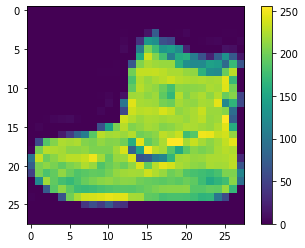

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

  - 신경망 모델에 주입하기 전, 이 값의 범위를 0~1 사이로 조정하여 데이터를 정규화한다. 그러기 위해서는 255로 나누어 준다.
  - 이때, *훈련 세트*와 *테스트 세트*를 동일한 방식으로 전처리하는 것이 중요하다.

In [10]:
# 데이터 정규화
train_images = train_images / 255.0

test_images = test_images / 255.0

  - *훈련 세트*에서 처음 25개의 이미지와 그 아래 클래스 이름을 출력해 보자. 
  - 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마친다.

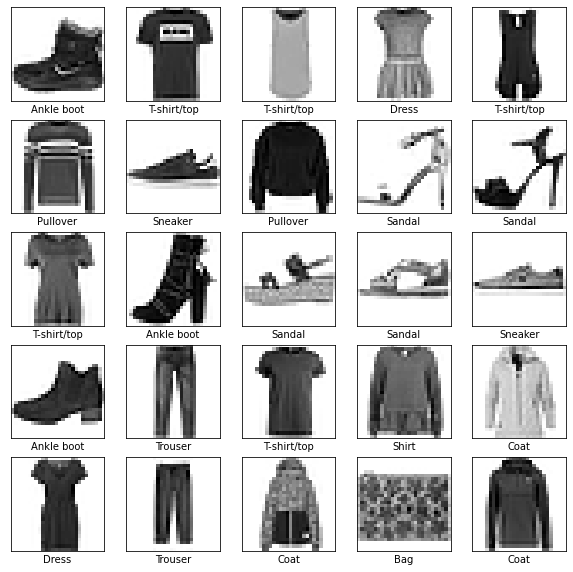

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## **4. 모델 구성**

  - 신경망 모델을 만들기 위해서는, 모델의 층을 구성하고 모델을 컴파일한다.

### **4.1 층 설정**

  - 신경망의 기본 빌딩 블록은 [*레이어*](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 이다. 
  - 레이어는 레이어에 공급된 데이터로부터 표현을 추출한다.

  - 대부분 딥러닝은 간단한 층을 연결하여 구성된다. `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습된다.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

  - 이 네트워크의 첫 번째 층인 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환한다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘린다. 이 층에는 학습되는 가중치가 없고, 데이터를 변환하기만 한다.

  - 픽셀을 펼친 후에는 두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결된다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부른다. 
    - 첫 번째 `Dense` 층은 128개의 노드(또는 뉴런)를 가진다. 
    - 두 번째 (마지막) 층은 10개의 노드의 *소프트맥스*(softmax) 층이다. 이 층은 10개의 확률을 반환하며, 반환된 값의 전체 합은 1이다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력한다.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### **4.2 모델 컴파일**

  - 모델을 훈련하기 전, 몇 가지 설정이 더 필요하다. 다음은 모델의 [*컴파일*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) 단계이다.

    - [*손실 함수*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) - 훈련 중 모델이 얼마나 정확한지 측정한다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 한다.
    - [*옵티마이저*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식이다.
    - [*메트릭*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — 훈련 및 테스트 단계를 모니터링하는 데 사용된다. 다음 예에서는 올바르게 분류된 이미지의 비율인 *정확도*를 사용한다.

## **5. 모델 훈련**

  - 신경망 모델의 훈련 단계

  1. 훈련 데이터를 모델에 주입한다. - `train_images`, `train_labels` 배열
  2. 모델이 이미지와 레이블을 매핑하는 방법을 학습한다.
  3. 테스트 세트에 대한 모델의 예측을 만든다. - `test_images` 배열 
  4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인합니다.


### **5.1 모델 피드**

  - 훈련을 시작하려면 [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 메서드를 호출한다. 

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4979 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3748 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3373 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3117 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2943 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2711 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2589 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2486 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

  - 모델이 훈련되면서 손실과 정확도 지표가 출력된다. 
  - 이 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 보인다.

### **5.2 정확도 평가**

  - 다음으로, 모델이 테스트 데이터 세트에서 작동하는 방식을 확인합니다.

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3888 - accuracy: 0.8602 - 628ms/epoch - 2ms/step

Test accuracy: 0.8601999878883362


  - 테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮다. 
  - 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 *과대적합*(overfitting) 때문이다. 
    - 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말한다.

### **5.3 예측하기**

  - 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행해 보자. 
  - 소프트맥스 레이어를 연결하여 [로짓](https://developers.google.com/machine-learning/glossary#logits)을 해석하기 쉬운 확률로 변환합니다.

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


  - 여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측하였다. 
  - 첫 번째 이미지에 대한 예측을 확인해 보자.

In [19]:
predictions[0]

array([6.6120180e-09, 2.4416664e-09, 1.7972873e-09, 4.0608241e-09,
       1.8356369e-08, 2.1139845e-04, 8.5512411e-08, 5.2129393e-03,
       1.6923418e-07, 9.9457538e-01], dtype=float32)

  - 이 예측은 10개의 숫자 배열로 나타난다.
  - 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타낸다. 가장 높은 신뢰도를 가진 레이블을 찾아보자.

In [20]:
np.argmax(predictions[0])

9

  - 모델은 이 이미지가 앵클 부츠(`class_name[9]`)라고 가장 확신하고 있다. 이 값이 맞는지 테스트 레이블을 통해 확인해 보자.

In [21]:
test_labels[0]

9

  - 10개 클래스에 대한 예측을 모두 그래프로 표현해 보자.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### **5.4 예측 확인**

  - 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행한다.

  - 0번째 데이터의 이미지, 예측, 신뢰도 점수 배열을 확인해 보자.

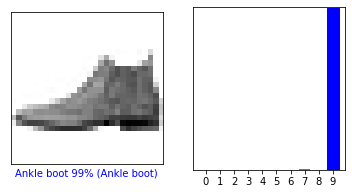

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

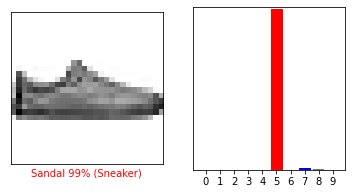

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

  - 몇 개의 이미지의 예측을 출력해 보자.
  - 올바르게 예측된 레이블은 파란색이고, 잘못 예측된 레이블은 빨강색이다. 
  - 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점이다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있다.

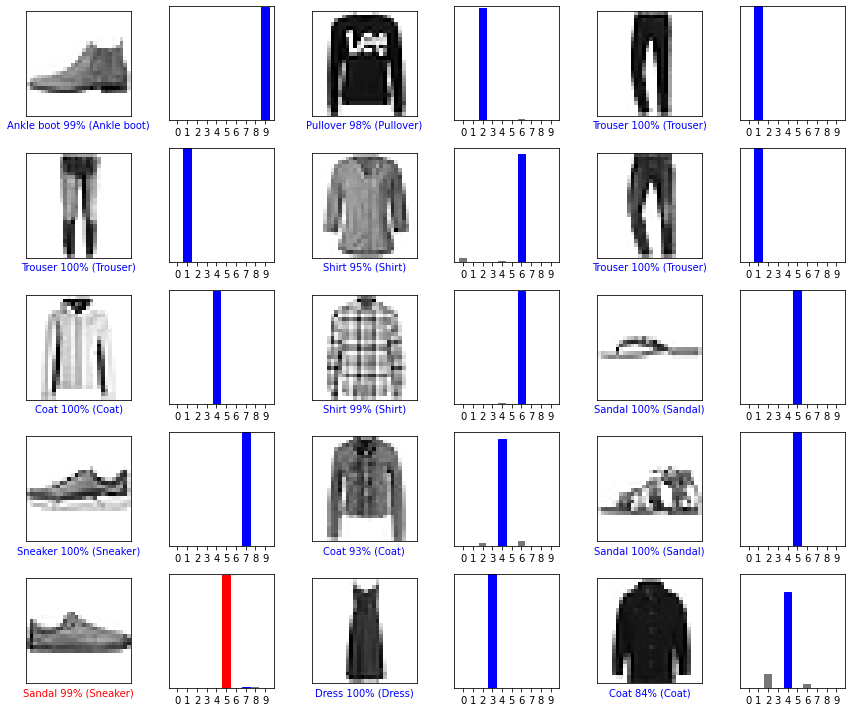

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

  - 실제로는 Sneaker이지만, Sandal을 99%로 잘못 예측한 경우도 있었다.
  - 이를 제외하고는 모두 높은 신뢰도로 정확한 예측을 보여준다.

## **6. 훈련된 모델 사용하기**

  - 마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만든다.

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


  - `tf.keras` 모델은 한 번에 샘플의 묶음 또는 *배치*(batch)로 예측을 만드는데 최적화되어 있다. 
  - 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 한다.

In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


  - 이제 이 이미지에 대한 예측을 생성한다.

In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[1.70366693e-04 8.97336285e-12 9.83640015e-01 1.02333875e-08
  5.60553139e-03 2.53624378e-12 1.05839893e-02 3.58552453e-22
  1.28544082e-08 3.72673030e-13]]


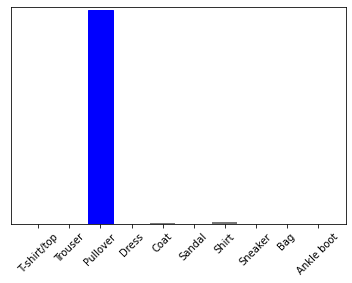

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

  - `tf.keras.Model.predict`는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환한다. 
  - 배치에서 (유일한) 이미지에 대한 예측을 가져온다.

In [30]:
np.argmax(predictions_single[0])

2

  - 예상과 같이 모델이 레이블을 예측한다.